# Annual Income

To do
* Tune models
* Deal with missing data

https://archive.ics.uci.edu/dataset/2/adult

## Preliminaries

### Imports

In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.random import sample_without_replacement
from sklearn.model_selection import GridSearchCV

### Import the data

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2).data.original 

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory data analysis

In [4]:
adult_eda = adult.copy()

In [5]:
adult_eda['income'] = adult_eda['income'].apply(lambda s: s[:-1] if s[-1]=='.' else s)

In [6]:
adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
adult_eda.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
adult_eda.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<Axes: title={'center': 'Counts of high and low income observations'}, xlabel='income'>

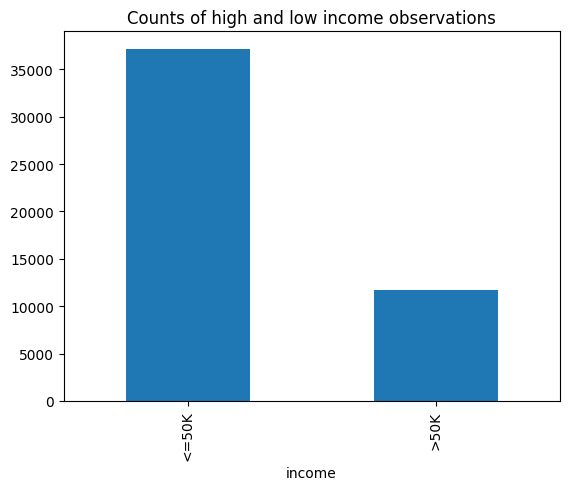

In [49]:
adult_eda['income'].value_counts().plot.bar(title='Counts of high and low income observations')

<Axes: title={'center': 'Counts of high and low income observations containing null values'}, xlabel='income'>

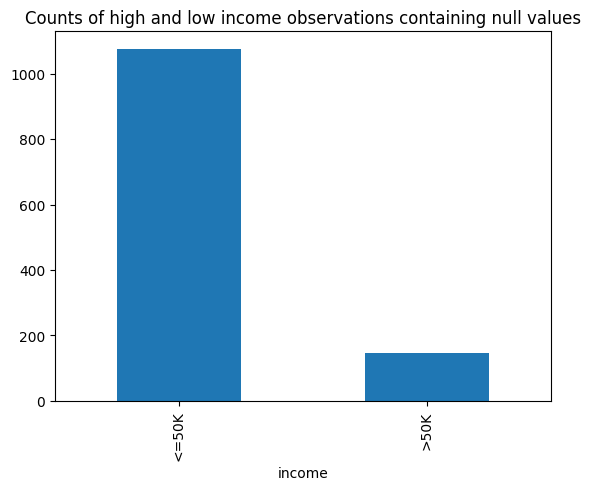

In [54]:
nulls = adult_eda[adult_eda.isna().any(axis=1)]
nulls['income'].value_counts().plot.bar(title='Counts of high and low income observations containing null values')

In [10]:
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
num_vars = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

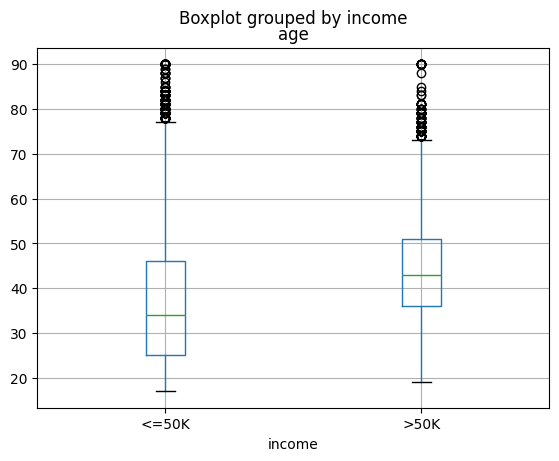

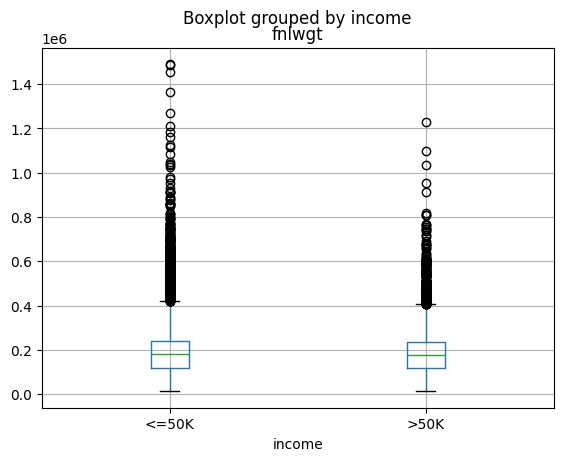

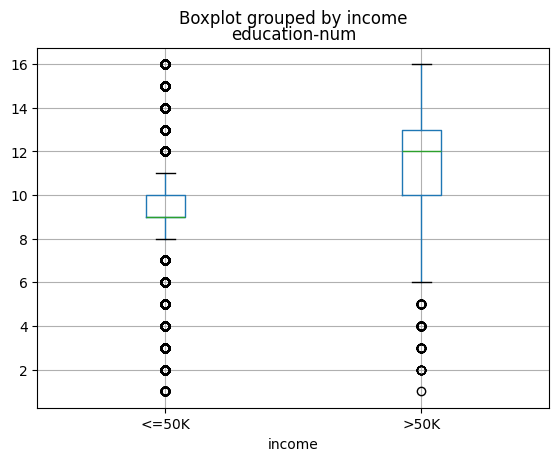

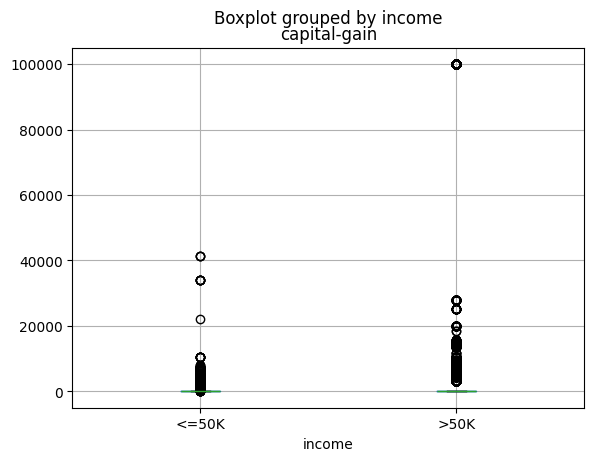

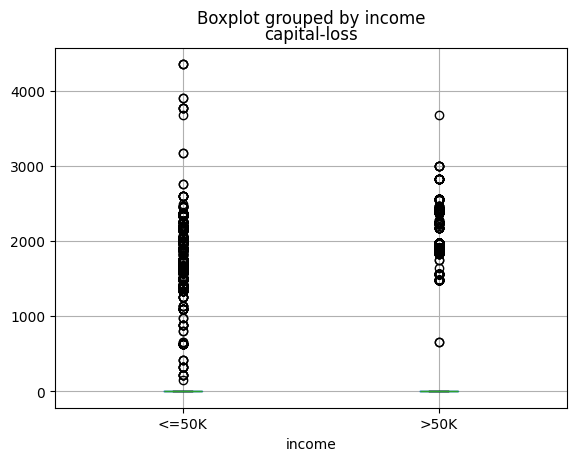

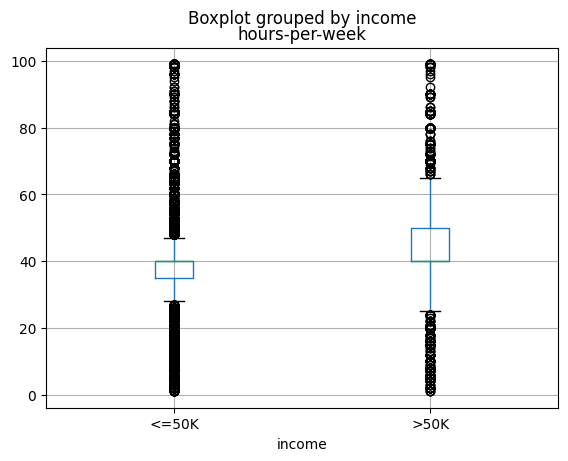

In [11]:
for num_var in num_vars:
    adult_eda.boxplot(column=num_var, by='income')

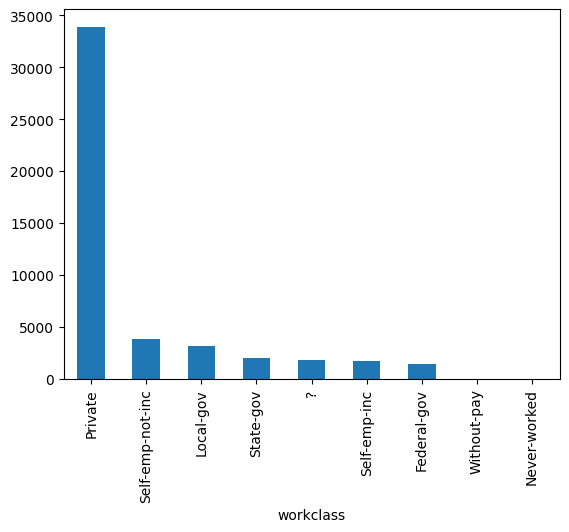

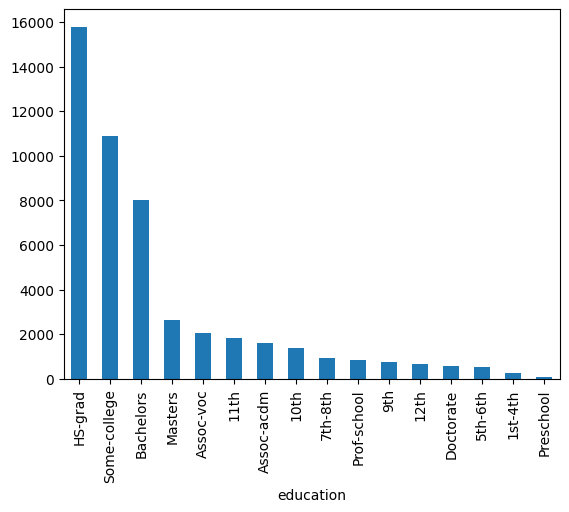

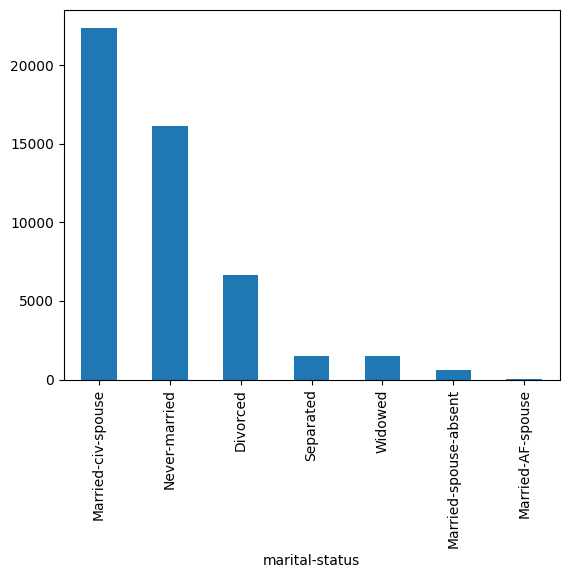

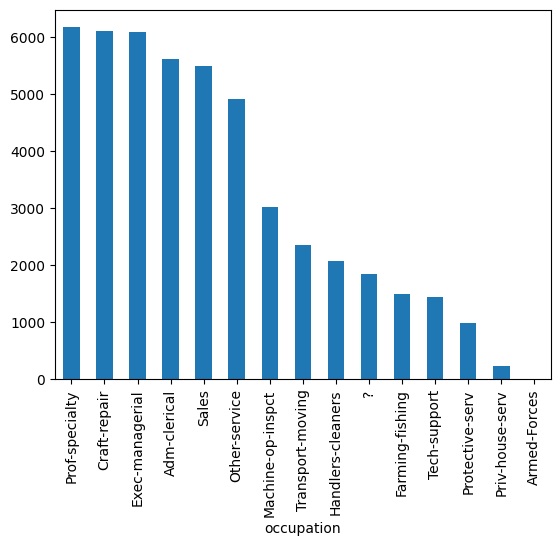

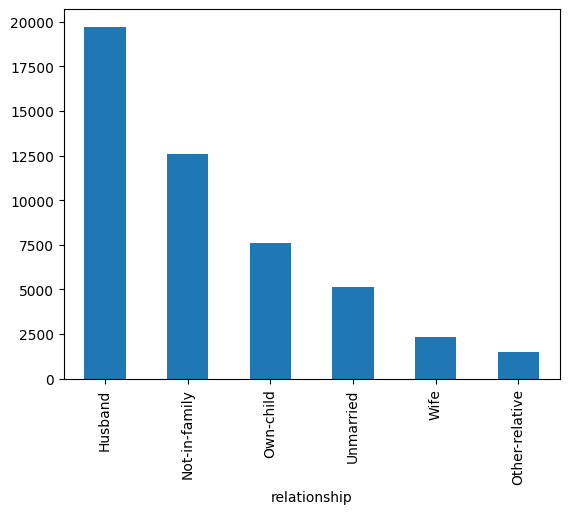

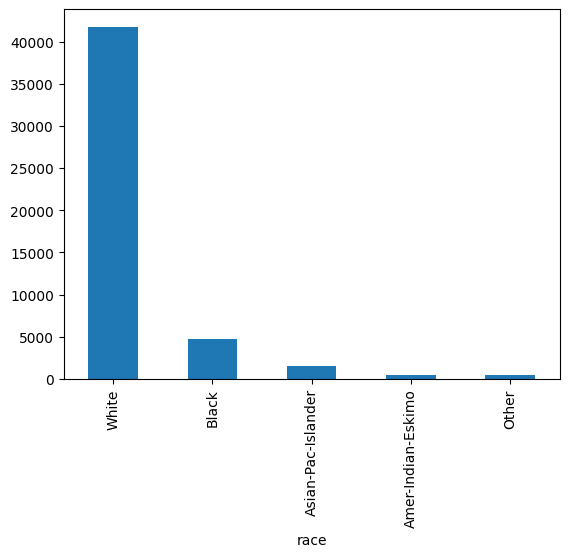

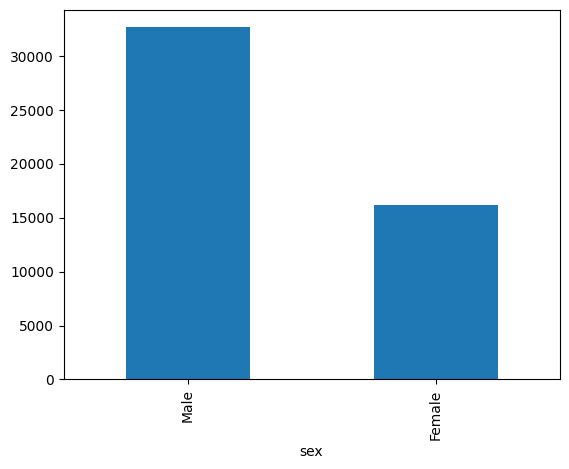

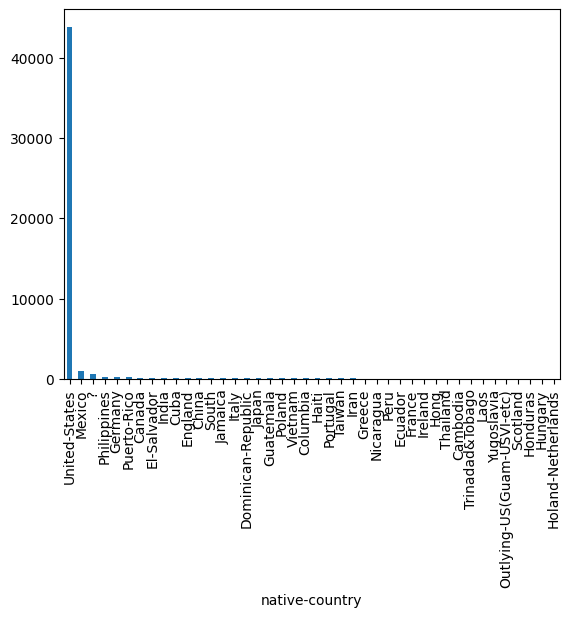

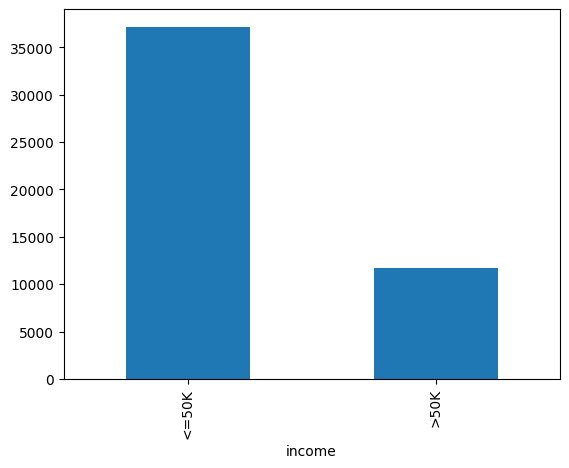

In [12]:
for cat_var in cat_vars:
    adult_eda[cat_var].value_counts().plot.bar()
    plt.show()

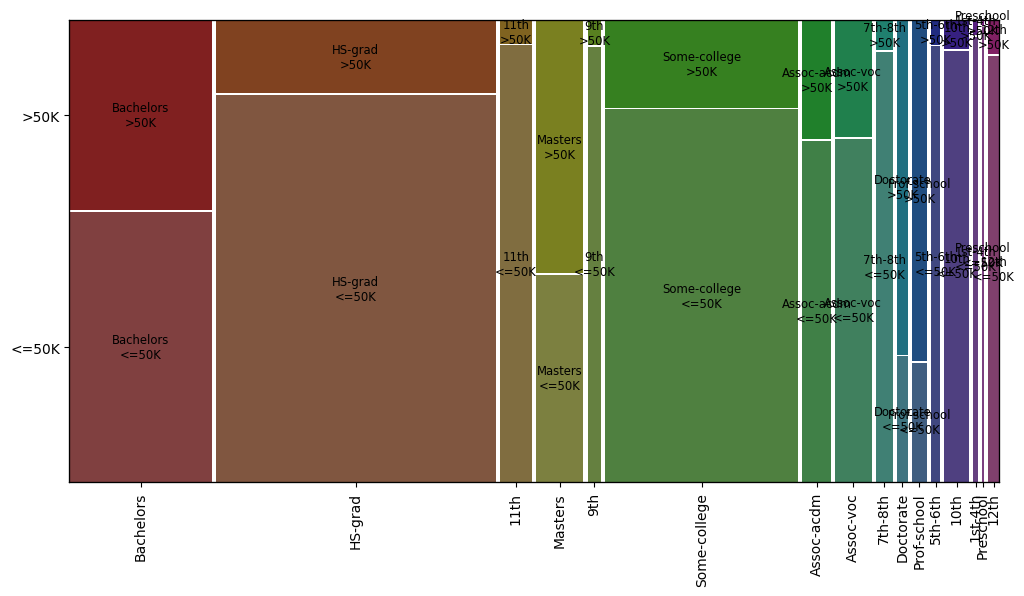

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['education', 'income']], ['education', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

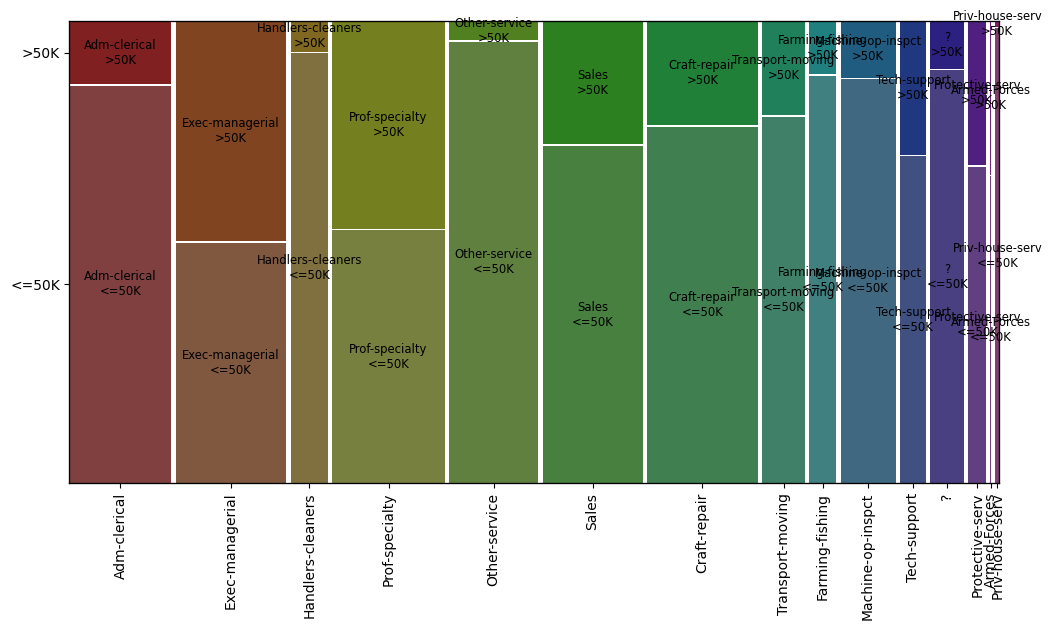

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['occupation', 'income']], ['occupation', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

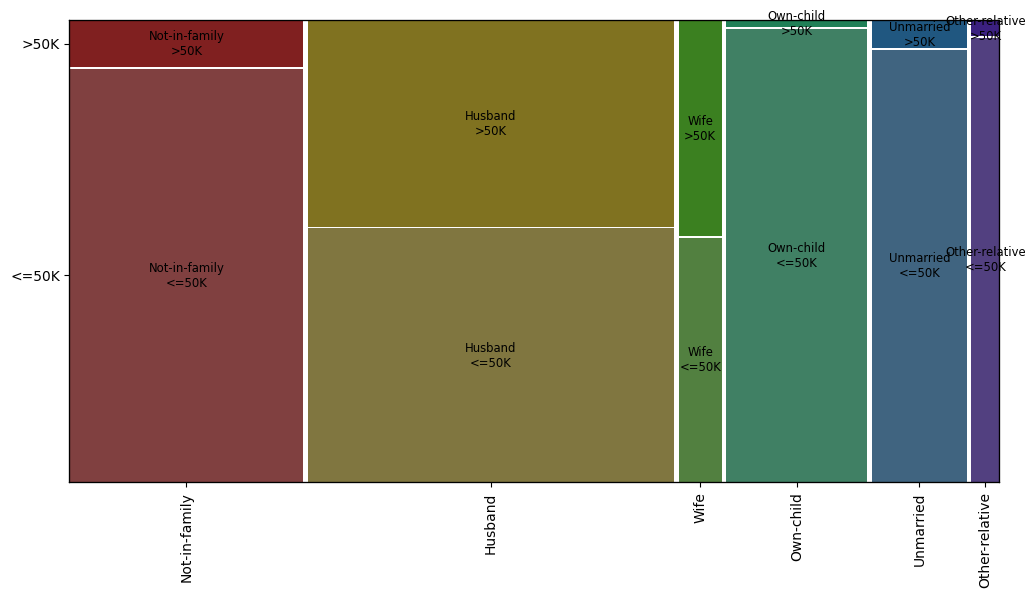

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['relationship', 'income']], ['relationship', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

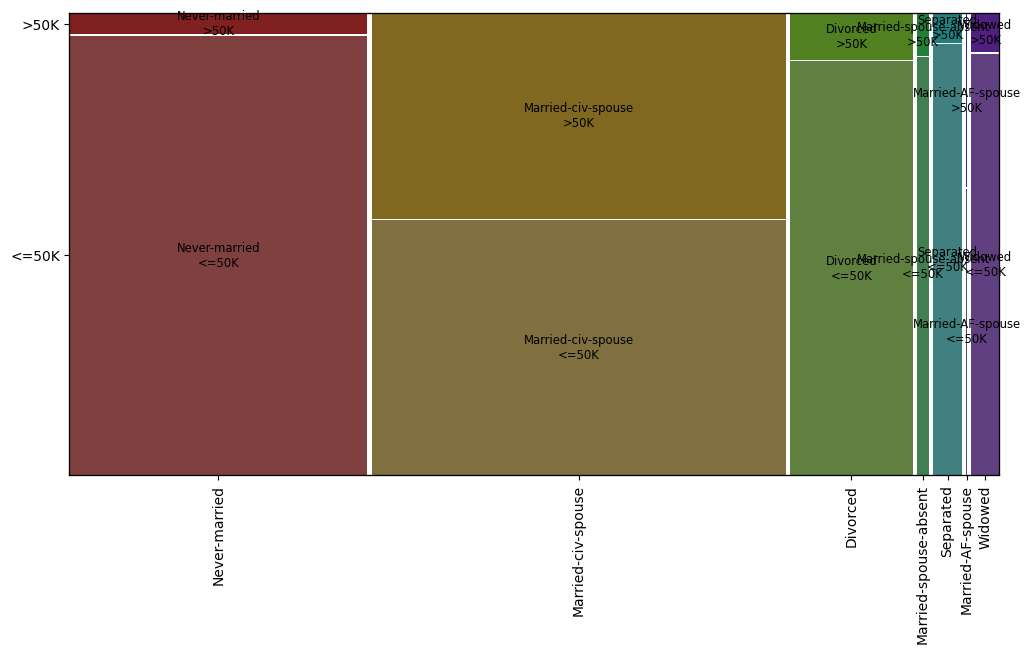

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['marital-status', 'income']], ['marital-status', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

In [ ]:
adult_eda['age group'] = adult_eda['age'].apply(lambda n: f"{n//10}0s")
income_count_age = adult_eda[['age group', 'income']].groupby(['age group', 'income']).size().reset_index().rename({0: 'count'}, axis=1) #.plot(kind='bar', title="Counts for age group, income groups")
high_income_count_age = income_count_age[income_count_age['income'] == '>50K']
low_income_count_age = income_count_age[income_count_age['income'] == '<=50K']


Text(0.5, 1.0, 'Count of high/low earners by age group')

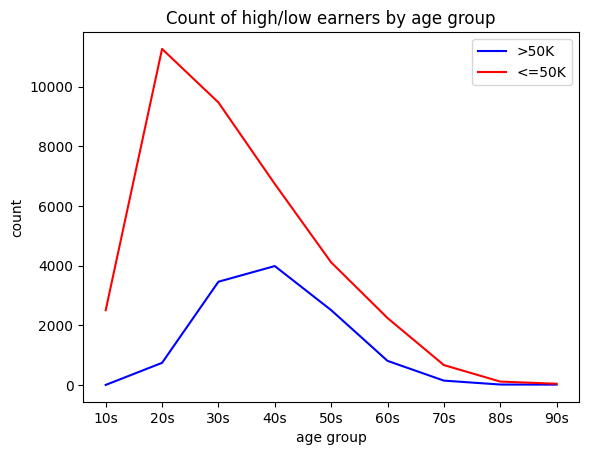

In [ ]:
fig, ax = plt.subplots()
ax.plot(high_income_count_age['age group'], high_income_count_age['count'], c='b', label='>50K')
ax.plot(low_income_count_age['age group'], low_income_count_age['count'], c='r', label='<=50K')
ax.set_xlabel('age group')
ax.set_ylabel('count')
ax.legend()
ax.set_title('Count of high/low earners by age group')

## Preprocessing

In [ ]:
preprocessed = adult.copy()

In [19]:
# Cleaning data
preprocessed["income"] = preprocessed["income"].apply(lambda s: s[0:-1] if s[-1]=="." else s)

In [20]:
# Creating dummy variables for categorical predictors
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
preprocessed = pd.get_dummies(preprocessed, columns=cat_vars, drop_first=True, dtype=int)

In [21]:
preprocessed.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    preprocessed.drop('income_>50K', axis=1), preprocessed.loc[:, "income_>50K"], test_size=0.2, random_state=42)

## Modelling

### Metrics for comparison

There are a number of different metrics that can be used to evaluate trained models (e.g. accuracy, error rate, sensitivity, precision) and selecting one depends on the broader context. For example, if we are predicting whether people have a genetic predisposition to a disease so that they can be invited for screening it is much more desirable to invite someone to a screening who doesn't need it rather than not invite someone to a screening who does need it. In this scenario specificity (TN/TN + FP) might be a desirable metric to maximise.
For the purposes of this project, I will assume that I am working on behalf of a luxury retailer that would like to target an advertising campaign at individuals with a relatively high income. The key here is to ensure that as much of the advertising budget as possible is spent on serving advertisements to people who are on a high income. Thus precision (TP / TP + FP) is a suitable metric for the purposes of this project.

### Utility methods

In [23]:
def error_rate(actual, predicted):
    return np.mean(actual != predicted)

In [24]:
def labelled_confusion_matrix(actual, predicted):
    columns = pd.MultiIndex.from_tuples([("predicted", "income_<=50K"), ("predicted", "income_>50K")])
    indicies = pd.MultiIndex.from_tuples([("actual", "income_<=50K"), ("actual", "income_>50K")])
    return pd.DataFrame(confusion_matrix(actual, predicted), index=indicies, columns=columns)

In [25]:
def precision(actual, predicted):
    df = pd.DataFrame({"actual": actual, "predicted": predicted})
    tp = df[(df.actual == 1) & (df.predicted==1)].shape[0]
    fn = df[(df.actual==1) & (df.predicted==0)].shape[0]
    return tp/(tp + fn)

In [26]:
def evaluate_model(actual, predicted):
    print(f"***Confusion Matrix***\n{labelled_confusion_matrix(actual, predicted)}\n\n***Error rate***\n{error_rate(actual, predicted)}\n\n***Precision***\n{precision(actual, predicted)}")

### KNN

In [27]:
knn = KNeighborsClassifier()
distributions = {"n_neighbors": [2, 4, 8, 16, 32]}
knn_search = RandomizedSearchCV(knn, distributions, random_state=0)
knn_search.fit(X_train, y_train)

/Users/jon.wong/Documents/Personal Development/Kaggle/annual-income/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 4, 8, 16, 32]},
                   random_state=0)

In [28]:
knn_search.best_params_

{'n_neighbors': 16}

In [29]:
# Train evaluation
evaluate_model(y_train, knn_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        29329         412
       income_>50K          7116        2216

***Error rate***
0.19266501164486985

***Precision***
0.23746249464209174


In [30]:
# Test evaluation
evaluate_model(y_test, knn_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         7273         141
       income_>50K          1837         518

***Error rate***
0.20247722387143002

***Precision***
0.2199575371549894


### Logistic regression

In [31]:
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            income_>50K   No. Observations:                39073
Model:                            GLM   Df Residuals:                    38975
Model Family:                Binomial   Df Model:                           97
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12313.
Date:                Mon, 16 Jun 2025   Deviance:                       24626.
Time:                        17:07:47   Pearson chi2:                 5.27e+05
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3745
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
age                                           0.0251      0.002     16.710      0.000       0.022       0.028
fnlwgt                                     7.639e-07   1.56e-07      4.904      0.000    4.59e-07    1.07e-06
education-num                                -1.4764      0.066    -22.414      0.000      -1.606      -1.347
capital-gain                                  0.0003   9.36e-06     33.480      0.000       0.000       0.000
capital-loss                                  0.0007    3.4e-05     19.506      0.000       0.001       0.001
hours-per-week                                0.0279      0.001     18.975      0.000       0.025       0.031
workclass_Federal-gov                         0.9346      0.126      7.399      0.000       0.687       1.182
workclass_Local-gov                           0.2384      0.117      2.035      0.042       0.009       0.468
workclass_Never-worked                      -18.1099   1.31e+04     -0.001      0.999   -2.58e+04    2.57e+04
workclass_Private                             0.4348      0.104      4.191      0.000       0.231       0.638
workclass_Self-emp-inc                        0.5881      0.124      4.748      0.000       0.345       0.831
workclass_Self-emp-not-inc                   -0.1898      0.114     -1.666      0.096      -0.413       0.033
workclass_State-gov                           0.1026      0.126      0.816      0.415      -0.144       0.349
workclass_Without-pay                        -0.4493      0.758     -0.593      0.553      -1.936       1.037
education_11th                                1.5634      0.219      7.148      0.000       1.135       1.992
education_12th                                3.5334      0.295     11.982      0.000       2.955       4.111
education_1st-4th                            -6.4234      0.501    -12.831      0.000      -7.405      -5.442
education_5th-6th                            -4.5463      0.316    -14.394      0.000      -5.165      -3.927
education_7th-8th                            -3.2677      0.219    -14.926      0.000      -3.697      -2.839
education_9th                                -1.6862      0.232     -7.268      0.000      -2.141      -1.232
education_Assoc-acdm                         10.3917      0.472     22.027      0.000       9.467      11.316
education_Assoc-voc                           8.7764      0.408     21.498      0.000       7.976       9.577
education_Bachelors                          12.3532      0.530     23.287      0.000      11.313      13.393
education_Doctorate                          17.7184      0.736     24.075      0.000      16.276      19.161
education_HS-grad                             5.3249      0.280     19.007      0.000       4.776       5.874
edu

In [33]:
# Train evaluation
evaluate_model(y_train, list(map(lambda n: 1 if  n > 0.5 else 0, result.predict()))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        27735        2006
       income_>50K          3708        5624

***Error rate***
0.14623909093235737

***Precision***
0.6026575225032147


In [34]:
# Test evaluation
evaluate_model(y_test, list(map(lambda n: 1 if  n > 0.5 else 0, result.predict(X_test)))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6932         482
       income_>50K           972        1383

***Error rate***
0.14883816153137475

***Precision***
0.5872611464968153


### SVM

In [37]:
svm_train_indicies = sample_without_replacement(X_train.shape[0], 10000, random_state=42)
svm_test_indicies = sample_without_replacement(X_test.shape[0], 1200, random_state=42)

In [38]:
X_train_svm = X_train.iloc[svm_train_indicies]
y_train_svm = y_train.iloc[svm_train_indicies]
X_test_svm = X_test.iloc[svm_test_indicies]
y_test_svm = y_test.iloc[svm_test_indicies]

#### Support vector classifier

In [ ]:
svc = svm.SVC(kernel="linear")
distributions = {"C": [0.1, 1, 10, 100]}
svc_search = GridSearchCV(svc, distributions)
svc_search.fit(X_train, y_train)

In [ ]:
svc_search.best_params_

SVC(kernel='linear')

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svc_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_test_svm, svc_search.predict(X_test_svm))

#### SVM with polynomial kernel

In [ ]:
svm_poly = svm.SVC(kernel="poly")
distributions = {"C": [0.1, 1, 10, 100],
                 "d": 3}
svm_poly_search = GridSearchCV(svm_poly, distributions)
svm_poly_search.fit(X_train, y_train)

In [ ]:
svm_poly_search.best_params_

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svm_poly_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_train_svm, svm_poly_search.predict(X_test_svm))

#### SVM with radial basis function

In [ ]:
svm_rbf = svm.SVC(kernel="rbf")
distributions = {"C": [0.1, 1, 10, 100],
                 "gamma": [0.1, 1, 10, 100]}
svm_rbf_search = RandomizedSearchCV(svm_rbf, distributions, n_iter=10, random_state=0)
svm_rbf_search.fit(X_train, y_train)

In [ ]:
svm_rbf_search.best_params_

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svm_rbf_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_train_svm, svm_rbf_search.predict(X_test_svm))

### Tree-based methods

#### Decision tree

In [35]:
dt = DTC(criterion='gini', max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

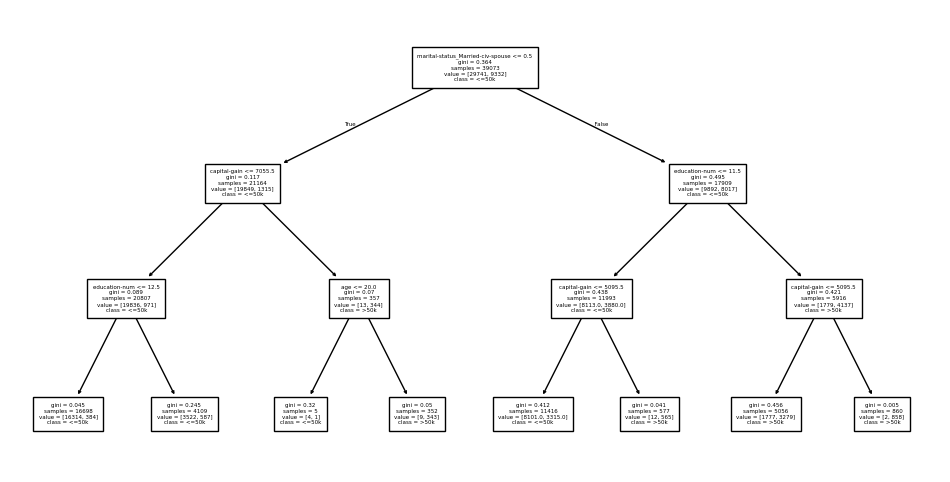

In [36]:
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X_train.columns, class_names=['<=50k', '>50k'], fontsize=4)
plt.show()

In [37]:
# Train evaluation
evaluate_model(y_train, dt.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        27941        1800
       income_>50K          4287        5045

***Error rate***
0.15578532490466562

***Precision***
0.5406129447063867


In [38]:
# Test evaluation
evaluate_model(y_test, dt.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6969         445
       income_>50K          1116        1239

***Error rate***
0.15979117616951583

***Precision***
0.5261146496815287


#### Bagging

In [39]:
bg = RandomForestClassifier(max_features=X_train.shape[1], random_state=42)
param_grid = {"n_estimators": [50, 100, 200, 400]}
bg_search = GridSearchCV(bg, param_grid)
bg_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_features=100,
                                              random_state=42),
             param_grid={'n_estimators': [50, 100, 200, 400]})

In [40]:
bg_search.best_params_

{'n_estimators': 100}

In [41]:
# Train evaluation
evaluate_model(y_train, bg_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        29738           3
       income_>50K             2        9330

***Error rate***
0.000127965602845955

***Precision***
0.9997856836690956


In [42]:
# Test evaluation
evaluate_model(y_test, bg_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6903         511
       income_>50K           897        1458

***Error rate***
0.14412938888320195

***Precision***
0.619108280254777


#### Random forests

In [43]:
rf = RandomForestClassifier(random_state=42)
param_grid = {"n_estimators": [50, 100, 200, 400],
              "max_features": ["sqrt", "log2"]}
rf_search = GridSearchCV(rf, param_grid)
rf_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 400]})

In [44]:
rf_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

In [45]:
# Train evaluation
evaluate_model(y_train, rf_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        29740           1
       income_>50K             2        9330

***Error rate***
7.677936170757301e-05

***Precision***
0.9997856836690956


In [46]:
# Test evaluation
evaluate_model(y_test, rf_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6887         527
       income_>50K           915        1440

***Error rate***
0.14760978605793837

***Precision***
0.6114649681528662


#### Boosting

In [47]:
bst = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=1, random_state=42)
distributions = {"learning_rate": [0.01, 0.1],
                 "n_estimators": [50, 100, 200, 400],
                 "max_depth": [1, 2, 3]}
bst_search = RandomizedSearchCV(bst, distributions, n_iter=10, random_state=0)
bst_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(max_depth=1,
                                                        n_estimators=200,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [48]:
# Train evaluation
evaluate_model(y_train, bst_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        28297        1444
       income_>50K          3124        6208

***Error rate***
0.1169093747600645

***Precision***
0.6652378911273039


In [50]:
# Test evaluation
evaluate_model(y_test, bst_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         7027         387
       income_>50K           847        1508

***Error rate***
0.12631794451837444

***Precision***
0.6403397027600849
